Kaggle에서 개인 json 파일을 업로드 해주세요

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sumc420","key":"a0072446a9ad9d17ab3921648d2bed50"}'}

In [ ]:
ls -1ha kaggle.json

kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

트레인 데이터 셋


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/train'

500개 종을 가진 외부 데이터 셋

In [ ]:
!kaggle datasets download -d gpiosenka/100-bird-species

 99% 1.94G/1.96G [00:23<00:00, 88.1MB/s]
100% 1.96G/1.96G [00:23<00:00, 88.2MB/s]


In [ ]:
!unzip /content/100-bird-species.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/WHITE TAILED TROPIC/120.jpg  
  inflating: train/WHITE TAILED TROPIC/121.jpg  
  inflating: train/WHITE TAILED TROPIC/122.jpg  
  inflating: train/WHITE TAILED TROPIC/123.jpg  
  inflating: train/WHITE TAILED TROPIC/124.jpg  
  inflating: train/WHITE TAILED TROPIC/125.jpg  
  inflating: train/WHITE TAILED TROPIC/126.jpg  
  inflating: train/WHITE TAILED TROPIC/127.jpg  
  inflating: train/WHITE TAILED TROPIC/128.jpg  
  inflating: train/WHITE TAILED TROPIC/129.jpg  
  inflating: train/WHITE TAILED TROPIC/130.jpg  
  inflating: train/WHITE TAILED TROPIC/131.jpg  
  inflating: train/WHITE TAILED TROPIC/132.jpg  
  inflating: train/WHITE TAILED TROPIC/133.jpg  
  inflating: train/WHITE TAILED TROPIC/134.jpg  
  inflating: train/WHITE TAILED TROPIC/135.jpg  
  inflating: train/WHITE TAILED TROPIC/136.jpg  
  inflating: train/WHITE TAILED TROPIC/137.jpg  
  inflating: train/WHITE TAILED TROPIC/138.jpg  
  inflating: train/WHITE TAILED T

In [ ]:
import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import time
import os
from tqdm import tqdm

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

외부데이터 추가

외부 데이터랑 기존 데이터 합쳐주기

In [ ]:
# #기존 데이터
# image_folders = os.listdir(data_dir)

# for folder_name in image_folders:
#     if os.path.isdir(os.path.join(data_dir, folder_name)):
#         # 폴더 이름에서 앞의 세 자리 숫자와 마침표를 제거하고 알파벳을 소문자로 변경
#         new_name = folder_name[4:].lower()
#         # 폴더의 전체 경로 변경
#         os.rename(os.path.join(data_dir, folder_name), os.path.join(data_dir, new_name))
#         print(f"{folder_name} -> {new_name}")

076.Dark_eyed_Junco -> dark_eyed_junco
015.Lazuli_Bunting -> lazuli_bunting
156.White_eyed_Vireo -> white_eyed_vireo
086.Pacific_Loon -> pacific_loon
081.Pied_Kingfisher -> pied_kingfisher
149.Brown_Thrasher -> brown_thrasher
067.Anna_Hummingbird -> anna_hummingbird
135.Bank_Swallow -> bank_swallow
200.Common_Yellowthroat -> common_yellowthroat
005.Crested_Auklet -> crested_auklet
041.Scissor_tailed_Flycatcher -> scissor_tailed_flycatcher
072.Pomarine_Jaeger -> pomarine_jaeger
104.American_Pipit -> american_pipit
013.Bobolink -> bobolink
127.Savannah_Sparrow -> savannah_sparrow
168.Kentucky_Warbler -> kentucky_warbler
082.Ringed_Kingfisher -> ringed_kingfisher
023.Brandt_Cormorant -> brandt_cormorant
099.Ovenbird -> ovenbird
141.Artic_Tern -> artic_tern
034.Gray_crowned_Rosy_Finch -> gray_crowned_rosy_finch
040.Olive_sided_Flycatcher -> olive_sided_flycatcher
084.Red_legged_Kittiwake -> red_legged_kittiwake
043.Yellow_bellied_Flycatcher -> yellow_bellied_flycatcher
185.Bohemian_Waxwing

In [ ]:
#외부데이터
extra_dir = '/content/train'

image_extra_folders = os.listdir(extra_dir)

for extra_folder_name in image_extra_folders:
    if os.path.isdir(os.path.join(extra_dir, extra_folder_name)):
        # 폴더 이름에서 앞의 세 자리 숫자와 마침표를 제거하고 알파벳을 소문자로 변경
        new_extra_name = extra_folder_name.replace(' ', '_').lower()
        # 폴더의 전체 경로 변경
        os.rename(os.path.join(extra_dir, extra_folder_name), os.path.join(extra_dir, new_extra_name))
        print(f"{extra_folder_name} -> {new_extra_name}")


SCARLET MACAW -> scarlet_macaw
PARAKETT  AUKLET -> parakett__auklet
SNOWY OWL -> snowy_owl
PHAINOPEPLA -> phainopepla
CEDAR WAXWING -> cedar_waxwing
CHESTNET BELLIED EUPHONIA -> chestnet_bellied_euphonia
FLAME TANAGER -> flame_tanager
GURNEYS PITTA -> gurneys_pitta
CRESTED COUA -> crested_coua
BLONDE CRESTED WOODPECKER -> blonde_crested_woodpecker
KING EIDER -> king_eider
WOODLAND KINGFISHER -> woodland_kingfisher
COCK OF THE  ROCK -> cock_of_the__rock
GREATER PEWEE -> greater_pewee
AMERICAN COOT -> american_coot
RUFUOS MOTMOT -> rufuos_motmot
BLACK-NECKED GREBE -> black-necked_grebe
MASKED BOOBY -> masked_booby
RED KNOT -> red_knot
YELLOW HEADED BLACKBIRD -> yellow_headed_blackbird
WILLOW PTARMIGAN -> willow_ptarmigan
SATYR TRAGOPAN -> satyr_tragopan
HAWAIIAN GOOSE -> hawaiian_goose
VIOLET GREEN SWALLOW -> violet_green_swallow
CHATTERING LORY -> chattering_lory
BLOOD PHEASANT -> blood_pheasant
BLACK-CAPPED CHICKADEE -> black-capped_chickadee
CUBAN TROGON -> cuban_trogon
CURL CRESTED A

In [ ]:
import shutil

# 디렉토리 경로 설정
extra_dir = '/content/train'
data_dir = '/content/drive/MyDrive'

# extra_dir의 각 폴더를 반복하여 처리
for folder in os.listdir(extra_dir):
    # 폴더 이름과 일치하는 파일 또는 폴더가 data_dir/train 안에 있는지 확인
    src_folder = os.path.join(data_dir, 'train', folder)
    if os.path.exists(src_folder):
        # 이미지 파일들을 대상 폴더로 옮기기
        src_images = os.path.join(extra_dir, folder)
        for file in os.listdir(src_images):
            src_file = os.path.join(src_images, file)
            dst_file = os.path.join(src_folder, file)
            shutil.move(src_file, dst_file)

        print(f"외부데이터 '{folder}'의 이미지를 원본 데이터로 옮겼습니다.")


외부데이터 'green_jay'의 이미지를 원본 데이터로 옮겼습니다.
외부데이터 'cedar_waxwing'의 이미지를 원본 데이터로 옮겼습니다.
외부데이터 'crested_auklet'의 이미지를 원본 데이터로 옮겼습니다.
외부데이터 'evening_grosbeak'의 이미지를 원본 데이터로 옮겼습니다.
외부데이터 'belted_kingfisher'의 이미지를 원본 데이터로 옮겼습니다.
외부데이터 'american_goldfinch'의 이미지를 원본 데이터로 옮겼습니다.
외부데이터 'caspian_tern'의 이미지를 원본 데이터로 옮겼습니다.
외부데이터 'gray_catbird'의 이미지를 원본 데이터로 옮겼습니다.
외부데이터 'ovenbird'의 이미지를 원본 데이터로 옮겼습니다.
외부데이터 'northern_flicker'의 이미지를 원본 데이터로 옮겼습니다.
외부데이터 'northern_fulmar'의 이미지를 원본 데이터로 옮겼습니다.
외부데이터 'spotted_catbird'의 이미지를 원본 데이터로 옮겼습니다.
외부데이터 'ivory_gull'의 이미지를 원본 데이터로 옮겼습니다.
외부데이터 'gray_kingbird'의 이미지를 원본 데이터로 옮겼습니다.
외부데이터 'american_pipit'의 이미지를 원본 데이터로 옮겼습니다.
외부데이터 'pomarine_jaeger'의 이미지를 원본 데이터로 옮겼습니다.
외부데이터 'red_faced_cormorant'의 이미지를 원본 데이터로 옮겼습니다.
외부데이터 'chipping_sparrow'의 이미지를 원본 데이터로 옮겼습니다.
외부데이터 'lazuli_bunting'의 이미지를 원본 데이터로 옮겼습니다.
외부데이터 'dark_eyed_junco'의 이미지를 원본 데이터로 옮겼습니다.
외부데이터 'ruby_throated_hummingbird'의 이미지를 원본 데이터로 옮겼습니다.
외부데이터 'baltimore_oriole'의 이미지를 원본 데이터로 옮겼습니다.
외부데이터 'red_headed_

Test를 위한 코드입니다.

In [ ]:
# !mkdir /content/test_set

In [ ]:
# import os
# import shutil

# extra_dir = '/content/valid'
# test_set_dir = '/content/test_set' #테스트에 사용할 파일 폴더 경로
# data_dir = '/content/drive/MyDrive'

# # test_set 폴더 생성
# os.makedirs(test_set_dir, exist_ok=True)

# # extra_dir의 각 폴더를 반복하여 처리
# for folder in os.listdir(extra_dir):
#     # 폴더 이름과 일치하는 파일 또는 폴더가 data_dir/train 안에 있는지 확인
#     src_folder = os.path.join(data_dir, 'train', folder)
#     if os.path.exists(src_folder):
#         # 이미지 파일들을 test_set 폴더로 옮기기
#         src_images = os.path.join(extra_dir, folder)
#         for file in os.listdir(src_images):
#             src_file = os.path.join(src_images, file)
#             dst_file = os.path.join(test_set_dir, file)
#             shutil.move(src_file, dst_file)

#         print(f"외부데이터 '{folder}'의 이미지를 test로 옮겼습니다.")


이미지 변환

추후 필요하면 추가할 것

고려하면 좋은 것
- 이미지 각도 돌리기 (실제 결과 별로 였음)
- 증강 비율 조정
- Cutmix / Mixup
- 이미지 밝기 / 대비 조정

(((애초에 데이터 셋이 크지 않다는 것 고려할 것)))

In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(p=0.5),    # 50% 확률로 수평방향 뒤집
        transforms.RandomVerticalFlip(p=0.5),      # 50% 확률로 이미지를 수직방향 뒤집
        transforms.RandomApply(torch.nn.ModuleList([transforms.ColorJitter()]), p=0.1),  # 10% 확률로 색상 증강
        transforms.Resize(256),                   # 이미지의 크기를 256x256 픽셀로 조정
        transforms.CenterCrop(224),               # 이미지의 중앙 부분을 224x224 자르기
        transforms.ToTensor(),                    # 이미지를 텐서로 변환
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),# 이미지를 정규화
        transforms.RandomErasing(p=0.25, value='random')  # 25% 확률로 랜덤 지우기
        #transforms.GaussianBlur(kernel_size=23),  # 가우시안 블러
    ]),
# 다만 validation은 건들지 말기
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

드라이브에 폴더 못 올려서 수정되어 있음(추후 변경 예정)

In [ ]:
# 여기는 건들지 말아주세요!
data_dir = '/content/drive/MyDrive/'
# 이미지 데이터셋 불러오기
full_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'),
                                          data_transforms['train'])

# 클래스명
class_names = full_dataset.classes

In [ ]:
# 데이터셋을 train과 valid로 나누기
train_size = int(0.7 * len(full_dataset))
valid_size = len(full_dataset) - train_size
train_dataset, valid_dataset = random_split(full_dataset, [train_size, valid_size])


#### 외부 데이터 추가한 이후 데이터 셋

- 패럿의 데이터

Train 데이터셋 개수: 7417

Valid 데이터셋 개수: 3180

- 외부 데이터 추가 이후 데이터

Train 데이터셋 개수: 13078

Valid 데이터셋 개수: 5606

In [ ]:
# train 데이터셋의 개수 확인
train_dataset_size = len(train_dataset)
print("Train 데이터셋 개수:", train_dataset_size)

# valid 데이터셋의 개수 확인
valid_dataset_size = len(valid_dataset)
print("Valid 데이터셋 개수:", valid_dataset_size)


Train 데이터셋 개수: 13078
Valid 데이터셋 개수: 5606


# 모델 선정
* Res2net
* NFNet
* DenseNet
* TResNet
* ConvNeXt-XL
* EfficientNet

## 각자 2개씩 맡아 분석
* EfficientNet
* NFNet
* TResNet



In [ ]:
# 데이터 로더
# 만약 CUDA out of Memory가 뜬다면
# 1. batch_size를 줄이거나,
# 2. 모델을 가벼운 걸로 바꾸거나
# 3. data_transforms 에서 Resize 부분을 작게해서 이미지 사이즈를 줄여주세요.
train_loader = DataLoader(train_dataset, batch_size= 16, shuffle=True, num_workers=2)
valid_loader = DataLoader(valid_dataset, batch_size= 16, shuffle=False, num_workers=2)

In [ ]:
# GPU 사용 가능 확인
# device(type='cuda', index=0) 가 뜬다면 GPU에서 훈련이 가능해지고 더 빨라집니다.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
!pip install timm

## nfnet 사용시
과적합 문제 존재
-> dropout을 이용

그럼에도 불구하고 valid loss가 줄어들지 않는 오버피팅 발생

결과

100%|██████████| 1739/1739 [07:36<00:00,  3.81it/s]
train Loss: 1.7678 Acc: 0.5796
100%|██████████| 746/746 [01:18<00:00,  9.53it/s]
valid Loss: 0.7832 Acc: 0.7761

Epoch 2/5
100%|██████████| 1739/1739 [07:36<00:00,  3.81it/s]
train Loss: 0.5852 Acc: 0.8324
100%|██████████| 746/746 [01:18<00:00,  9.52it/s]
valid Loss: 0.5990 Acc: 0.8273

Epoch 3/5
100%|██████████| 1739/1739 [07:36<00:00,  3.81it/s]
train Loss: 0.3838 Acc: 0.8876
100%|██████████| 746/746 [01:18<00:00,  9.54it/s]
valid Loss: 0.5208 Acc: 0.8568

Epoch 4/5
100%|██████████| 1739/1739 [07:36<00:00,  3.81it/s]
train Loss: 0.2653 Acc: 0.9213
100%|██████████| 746/746 [01:18<00:00,  9.49it/s]
valid Loss: 0.5029 Acc: 0.8598

Epoch 5/5
—————
100%|██████████| 1739/1739 [07:36<00:00,  3.81it/s]
train Loss: 0.1998 Acc: 0.9404
100%|██████████| 746/746 [01:18<00:00,  9.50it/s]
valid Loss: 0.4803 Acc: 0.8673
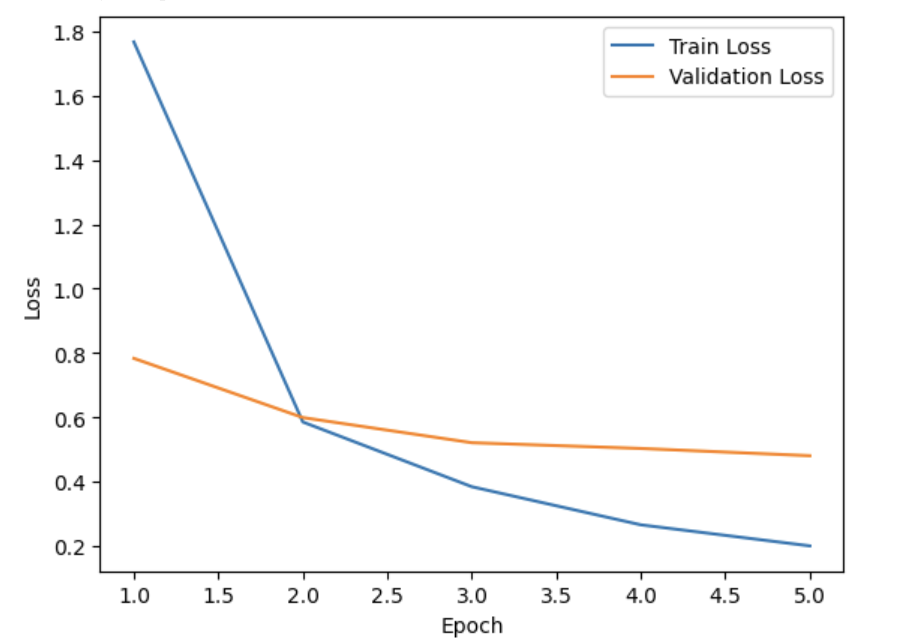

In [ ]:
import timm

# 여러분이 원하는 모델을 여기서 설정해주세요
model = timm.create_model('dm_nfnet_f0', pretrained=True)

# NFNet은 classifier head를 model의 마지막에 포함하고 있습니다.
# 기존의 classifier head를 삭제하고 새로운 classifier head를 추가합니다.
dropout_prob = 0.2
num_ftrs = model.head.fc.in_features
model.head.fc = nn.Sequential(
    nn.Dropout(p=dropout_prob),
    nn.Linear(num_ftrs, len(class_names))
)

# 모델 GPU에 올리기
model = model.to(device)

# 손실 함수와 optimizer 설정
# optimizer도 다양하게 바꿔가면서 해보시면 좋습니다. 특히 lr (학습률) 관련해서 잘 설정해주세요
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# scheduler 설정
# torch.optim.lr_scheduler에 보면 다양한 scheduler가 존재합니다. 한번 확인해보고 다양하게 시도해보세요
step_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# epoch 횟수 설정
num_epochs = 5


## TResNet 사용시
외부 데이터 포함 X

epoch 10번 train Loss: 0.5699 Acc: 0.8629

외부 데이터 포함

epoch 5번 valid Loss: 0.7759 Acc: 0.7865

In [ ]:
import timm

# 여러분이 원하는 모델을 여기서 설정해주세요
model = timm.create_model('tresnet_m', pretrained=True)

# 새로운 분류기를 마지막 레이어에 추가
num_ftrs = model.head.fc.in_features
model.head.fc = nn.Linear(num_ftrs, len(class_names))

# 모델 GPU에 올리기
model = model.to(device)

In [ ]:
# 손실 함수와 optimizer 설정
# optimizer도 다양하게 바꿔가면서 해보시면 좋습니다. 특히 lr (학습률) 관련해서 잘 설정해주세요
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

# scheduler 설정
# torch.optim.lr_scheduler에 보면 다양한 scheduler가 존재합니다. 한번 확인해보고 다양하게 시도해보세요
step_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# epoch 횟수 설정
num_epochs=5

In [ ]:
# # 모델 학습과 평가
# # 이 부분은 건드셔도 되고 안건드셔도 됩니다.
# for epoch in range(num_epochs):
#     print('Epoch {}/{}'.format(epoch+1, num_epochs))
#     print('-' * 10)
#     for phase in ['train', 'valid']:
#         if phase == 'train':
#             dataloader = train_loader
#             model.train()
#         else:
#             dataloader = valid_loader
#             model.eval()

#         running_loss = 0.0
#         running_corrects = 0

#         for inputs, labels in tqdm(dataloader):
#             inputs = inputs.to(device)
#             labels = labels.to(device)

#             optimizer.zero_grad()

#             with torch.set_grad_enabled(phase == 'train'):
#                 outputs = model(inputs)
#                 _, preds = torch.max(outputs, 1)
#                 loss = criterion(outputs, labels)

#                 if phase == 'train':
#                     loss.backward()
#                     optimizer.step()

#             running_loss += loss.item() * inputs.size(0)
#             running_corrects += torch.sum(preds == labels.data)
#         if phase == 'train':
#             step_lr_scheduler.step()

#         epoch_loss = running_loss / len(dataloader.dataset)
#         epoch_acc = running_corrects.double() / len(dataloader.dataset)

#         print('{} Loss: {:.4f} Acc: {:.4f}'.format(
#             phase, epoch_loss, epoch_acc))

# print('Training complete')

In [ ]:
import matplotlib.pyplot as plt

# Lists to store loss values for plotting
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch+1, num_epochs))
    print('-' * 10)
    for phase in ['train', 'valid']:
        if phase == 'train':
            dataloader = train_loader
            model.train()
        else:
            dataloader = valid_loader
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in tqdm(dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
        if phase == 'train':
            step_lr_scheduler.step()

        epoch_loss = running_loss / len(dataloader.dataset)
        epoch_acc = running_corrects.double() / len(dataloader.dataset)

        print('{} Loss: {:.4f} Acc: {:.4f}'.format(
            phase, epoch_loss, epoch_acc))

        # Save loss values for plotting
        if phase == 'train':
            train_losses.append(epoch_loss)
        else:
            valid_losses.append(epoch_loss)

print('Training complete')

# Plot the loss values
plt.figure()
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/5
----------


100%|██████████| 818/818 [05:39<00:00,  2.41it/s]


train Loss: 2.1074 Acc: 0.5263


100%|██████████| 351/351 [01:41<00:00,  3.47it/s]


valid Loss: 0.8891 Acc: 0.7515
Epoch 2/5
----------


100%|██████████| 818/818 [05:39<00:00,  2.41it/s]


train Loss: 0.6572 Acc: 0.8156


100%|██████████| 351/351 [00:57<00:00,  6.12it/s]


valid Loss: 0.6230 Acc: 0.8255
Epoch 3/5
----------


 68%|██████▊   | 559/818 [03:52<01:46,  2.44it/s]

In [ ]:
# 전체 모델 저장하는 부분입니다.
# PATH에는 저장할 경로를 지정해주세요
PATH = './'
torch.save(model, PATH + 'model.pt')

왤까 ???

## EfficientNet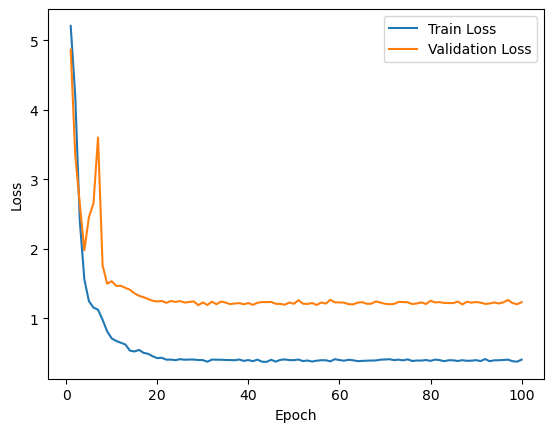

# 최종 모델 선정
Tresnet을 이용

lr 0.001

# 궁금점, 해야할 것
* 모델 완성 후 test 과정
* 데이터 전처리의 중요성
* 큰 차이 없는 파라미터
* 오버피팅을 줄이는 방법에 대한 다양한 고민
* 주어진 환경 (colab / jupyter lab / 개인시간 ) > batch size와 epoch을 바꿔보고 싶은데..
* efficientNet > 옵티마이저 ADAM으로 바꿔보기
### 다른 옵티마이저 사용해보기
valid 튈 때 > 특정 새에 대해 제대로 못 학습한 거일 수도 -> 어떤 새인지 (특정 라벨에 대한 학습 문제가 있지 않을까?) 확인해서 바꿔보는 등으로 성능을 좋게 해줄 수도 있음
